In [233]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mse-2-ai-201-b-ai-d/sample_submission.csv
/kaggle/input/mse-2-ai-201-b-ai-d/train.csv
/kaggle/input/mse-2-ai-201-b-ai-d/test.csv


In [234]:
import pandas as pd
import numpy as np

In [235]:
df = pd.read_csv("/kaggle/input/mse-2-ai-201-b-ai-d/train.csv")

In [236]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,NaN,NaN,483.3133,194.6325,0.9153,304.2065,0.9681,75075.0,0.7105,2.4832,0.6052,0.6294,0.0066,0.0027,0.3962,0.9838,Kirmizi_Pistachio
1,100409.0,1219.521,NaN,275.7984,0.8077,357.5538,0.9920,101215.0,0.7639,1.6961,0.8484,0.7644,NaN,0.0027,0.5842,0.9909,Siit_Pistachio
2,80569.0,NaN,498.0320,212.6353,0.9043,320.2868,0.9534,84508.0,0.6326,2.3422,0.5832,0.6431,0.0062,0.0026,0.4136,0.9687,NaN
3,58386.0,1088.683,423.7374,187.3131,0.8970,272.6525,0.9061,64440.0,0.6668,2.2622,0.6190,0.6434,0.0073,0.0032,0.4140,0.9366,NaN
4,84056.0,NaN,464.7390,237.5981,0.8594,327.1443,0.9427,89167.0,0.7534,1.9560,0.5506,0.7039,0.0055,0.0028,0.4955,NaN,Kirmizi_Pistachio


In [237]:
categorical_cols = df.select_dtypes(include=["O"]).columns

print(categorical_cols)

Index(['Class'], dtype='object')


In [238]:
df.isna().sum()

AREA             155
PERIMETER        265
MAJOR_AXIS       225
MINOR_AXIS       205
ECCENTRICITY     110
EQDIASQ          110
SOLIDITY          95
CONVEX_AREA      233
EXTENT           193
ASPECT_RATIO     243
ROUNDNESS         94
COMPACTNESS      282
SHAPEFACTOR_1    237
SHAPEFACTOR_2    115
SHAPEFACTOR_3    118
SHAPEFACTOR_4    126
Class            136
dtype: int64

In [239]:
cols = df.select_dtypes(include=["int", "float"]).columns

for i in cols:
    df[i] = df[i].fillna(df[i].median())

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1824 non-null   float64
 1   PERIMETER      1824 non-null   float64
 2   MAJOR_AXIS     1824 non-null   float64
 3   MINOR_AXIS     1824 non-null   float64
 4   ECCENTRICITY   1824 non-null   float64
 5   EQDIASQ        1824 non-null   float64
 6   SOLIDITY       1824 non-null   float64
 7   CONVEX_AREA    1824 non-null   float64
 8   EXTENT         1824 non-null   float64
 9   ASPECT_RATIO   1824 non-null   float64
 10  ROUNDNESS      1824 non-null   float64
 11  COMPACTNESS    1824 non-null   float64
 12  SHAPEFACTOR_1  1824 non-null   float64
 13  SHAPEFACTOR_2  1824 non-null   float64
 14  SHAPEFACTOR_3  1824 non-null   float64
 15  SHAPEFACTOR_4  1824 non-null   float64
 16  Class          1688 non-null   object 
dtypes: float64(16), object(1)
memory usage: 242.4+ KB


In [241]:
df.dropna(inplace=True)

<Axes: >

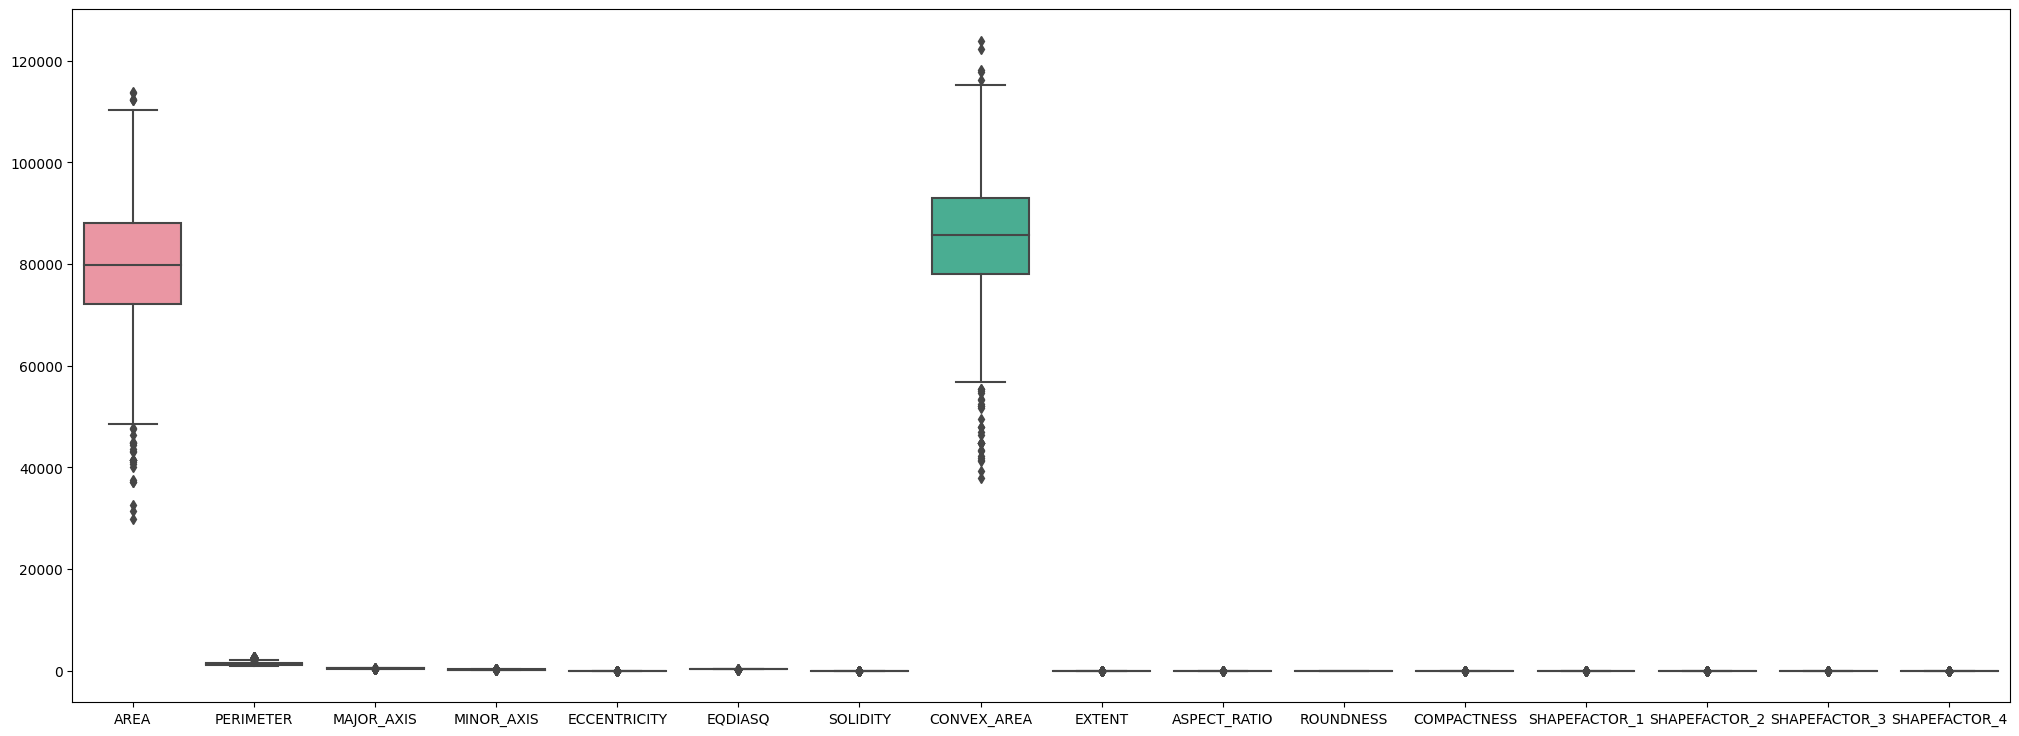

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,9))

sns.boxplot(df)

<Axes: >

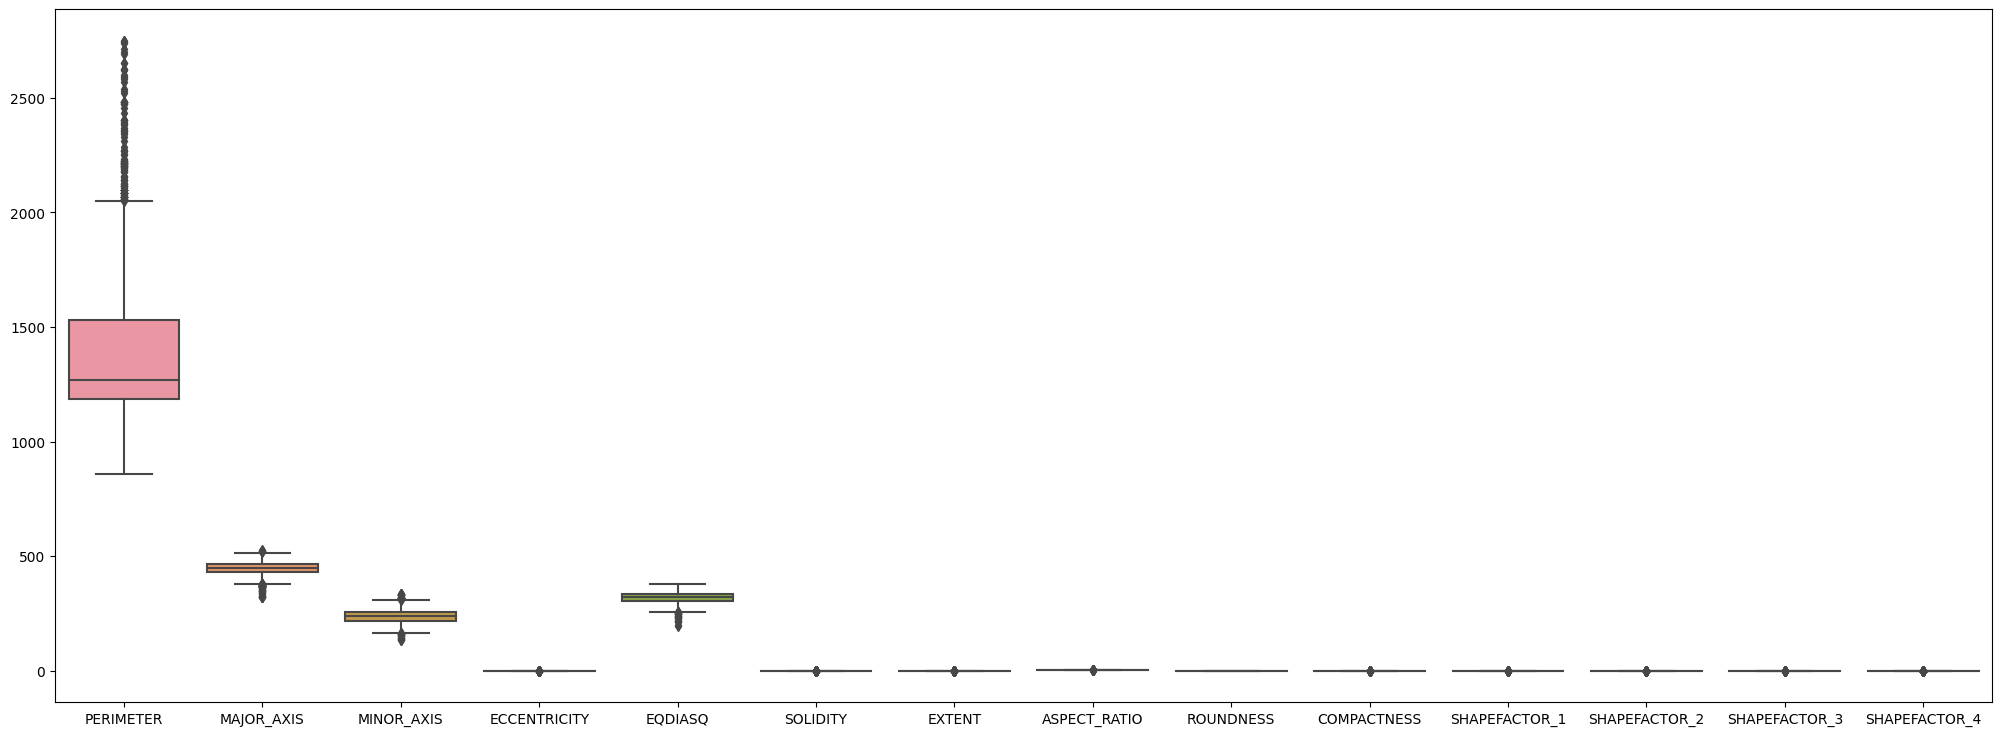

In [243]:
df = df.drop(['AREA','CONVEX_AREA'], axis=1)

plt.figure(figsize=(25,9))
sns.boxplot(df)

In [244]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Class"] = le.fit_transform(df["Class"])

In [245]:
df.head()

,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,1267.274,483.3133,194.6325,0.9153,304.2065,0.9681,0.7105,2.4832,0.6052,0.6294,0.0066,0.0027,0.3962,0.98380,0
1,1219.521,448.4252,275.7984,0.8077,357.5538,0.9920,0.7639,1.6961,0.8484,0.7644,0.0056,0.0027,0.5842,0.99090,1
4,1267.274,464.7390,237.5981,0.8594,327.1443,0.9427,0.7534,1.9560,0.5506,0.7039,0.0055,0.0028,0.4955,0.97275,0
5,1778.967,369.1220,221.9524,0.7990,279.7129,0.9230,0.7268,1.6631,0.2440,0.7578,0.0060,0.0036,0.5742,0.95500,1
6,1169.630,464.4752,254.7480,0.8362,343.2647,0.9921,0.7556,1.8233,0.8501,0.7390,0.0050,0.0028,0.5462,0.99580,1


In [246]:
from sklearn.model_selection import train_test_split

X = df.drop(["Class"], axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [247]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier( n_estimators = 1000, max_depth=20, random_state=51)

In [248]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [249]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.8846153846153846


In [250]:
test = pd.read_csv("/kaggle/input/mse-2-ai-201-b-ai-d/test.csv")

In [251]:
test.isna().sum()

id               0
AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
dtype: int64

In [252]:
test = test.drop(["AREA","CONVEX_AREA"],axis=1)

In [253]:
ID = test['id']
test.drop(["id"],axis=1, inplace=True)
test.head()

,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
0,1851.574,438.8182,261.1837,0.8036,271.1376,0.7170,0.5507,1.6801,0.2116,0.6179,0.0076,0.0045,0.3818,0.6414
1,2062.064,453.1792,335.8377,0.6714,326.1035,0.7482,0.6197,1.3494,0.2468,0.7196,0.0054,0.0040,0.5178,0.6987
2,1982.064,422.6460,231.4328,0.8368,268.2862,0.7620,0.5634,1.8262,0.1808,0.6348,0.0075,0.0041,0.4029,0.7359
3,1933.293,472.1519,241.1400,0.8597,319.9806,0.8720,0.6852,1.9580,0.2704,0.6777,0.0059,0.0030,0.4593,0.8993
4,1239.403,428.7899,223.9258,0.8528,303.0638,0.9222,0.7338,1.9149,0.5901,0.7068,0.0059,0.0031,0.4996,0.9566


In [254]:
y_final = model.predict(test)

In [255]:
print(y_final)

[1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0
 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1
 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1
 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0
 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0
 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1
 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0
 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 

In [256]:
final = []
for i in y_final:
    if(i==0):
        final.append('Kirmizi_Pistachio')
    else:
        final.append('Siit_Pistachio')

In [257]:
final = np.array(final)
print(final)

['Siit_Pistachio' 'Siit_Pistachio' 'Kirmizi_Pistachio' 'Kirmizi_Pistachio'
 'Kirmizi_Pistachio' 'Siit_Pistachio' 'Kirmizi_Pistachio'
 'Kirmizi_Pistachio' 'Siit_Pistachio' 'Kirmizi_Pistachio'
 'Kirmizi_Pistachio' 'Kirmizi_Pistachio' 'Kirmizi_Pistachio'
 'Kirmizi_Pistachio' 'Siit_Pistachio' 'Kirmizi_Pistachio'
 'Kirmizi_Pistachio' 'Kirmizi_Pistachio' 'Kirmizi_Pistachio'
 'Siit_Pistachio' 'Kirmizi_Pistachio' 'Siit_Pistachio' 'Siit_Pistachio'
 'Kirmizi_Pistachio' 'Kirmizi_Pistachio' 'Kirmizi_Pistachio'
 'Siit_Pistachio' 'Kirmizi_Pistachio' 'Kirmizi_Pistachio'
 'Kirmizi_Pistachio' 'Kirmizi_Pistachio' 'Siit_Pistachio' 'Siit_Pistachio'
 'Kirmizi_Pistachio' 'Siit_Pistachio' 'Kirmizi_Pistachio'
 'Kirmizi_Pistachio' 'Siit_Pistachio' 'Siit_Pistachio' 'Kirmizi_Pistachio'
 'Kirmizi_Pistachio' 'Siit_Pistachio' 'Siit_Pistachio' 'Kirmizi_Pistachio'
 'Kirmizi_Pistachio' 'Kirmizi_Pistachio' 'Siit_Pistachio'
 'Kirmizi_Pistachio' 'Kirmizi_Pistachio' 'Kirmizi_Pistachio'
 'Siit_Pistachio' 'Kirmizi_Pistachio

In [258]:
ans = pd.DataFrame({
    "id" : ID,
    "Class" : final
})

ans.head()

,id,Class
0,1,Siit_Pistachio
1,2,Siit_Pistachio
2,3,Kirmizi_Pistachio
3,4,Kirmizi_Pistachio
4,5,Kirmizi_Pistachio


In [259]:
df.head()

,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,1267.274,483.3133,194.6325,0.9153,304.2065,0.9681,0.7105,2.4832,0.6052,0.6294,0.0066,0.0027,0.3962,0.98380,0
1,1219.521,448.4252,275.7984,0.8077,357.5538,0.9920,0.7639,1.6961,0.8484,0.7644,0.0056,0.0027,0.5842,0.99090,1
4,1267.274,464.7390,237.5981,0.8594,327.1443,0.9427,0.7534,1.9560,0.5506,0.7039,0.0055,0.0028,0.4955,0.97275,0
5,1778.967,369.1220,221.9524,0.7990,279.7129,0.9230,0.7268,1.6631,0.2440,0.7578,0.0060,0.0036,0.5742,0.95500,1
6,1169.630,464.4752,254.7480,0.8362,343.2647,0.9921,0.7556,1.8233,0.8501,0.7390,0.0050,0.0028,0.5462,0.99580,1


In [260]:
ans.to_csv("answer.csv", index = False)

In [261]:
ans.head()

,id,Class
0,1,Siit_Pistachio
1,2,Siit_Pistachio
2,3,Kirmizi_Pistachio
3,4,Kirmizi_Pistachio
4,5,Kirmizi_Pistachio
